<a href="https://colab.research.google.com/github/Aditya12D/Dog-vs-cat-classification/blob/main/dog_v_catclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 71% 154M/218M [00:00<00:00, 1.61GB/s]
100% 218M/218M [00:00<00:00, 984MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [6]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/training_set/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test_set/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [7]:
for images, labels in train_ds.take(1):
    print(images)
    print(labels)

tf.Tensor(
[[[[7.40000000e+01 6.50000000e+01 5.80000000e+01]
   [7.40000000e+01 6.50000000e+01 5.80000000e+01]
   [7.20000000e+01 6.50000000e+01 5.70000000e+01]
   ...
   [6.93828125e+01 7.06171875e+01 7.00000000e+01]
   [6.82890625e+01 7.10000000e+01 7.24296875e+01]
   [6.54765625e+01 6.94765625e+01 7.04765625e+01]]

  [[7.40000000e+01 6.50000000e+01 5.80000000e+01]
   [7.40000000e+01 6.50000000e+01 5.80000000e+01]
   [7.20000000e+01 6.50000000e+01 5.70000000e+01]
   ...
   [7.00742188e+01 7.13085938e+01 7.06914062e+01]
   [6.89804688e+01 7.16914062e+01 7.31210938e+01]
   [6.61679688e+01 7.01679688e+01 7.11679688e+01]]

  [[7.40000000e+01 6.50000000e+01 5.80000000e+01]
   [7.40000000e+01 6.50000000e+01 5.80000000e+01]
   [7.20000000e+01 6.50000000e+01 5.70000000e+01]
   ...
   [7.05351562e+01 7.17695312e+01 7.11523438e+01]
   [6.93759460e+01 7.20868835e+01 7.35165710e+01]
   [6.66289062e+01 7.06289062e+01 7.16289062e+01]]

  ...

  [[1.03648438e+02 8.46484375e+01 6.76484375e+01]
   [1

In [8]:
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [9]:
for images, labels in train_ds.take(1):
    print(images)
    print(labels)

tf.Tensor(
[[[[0.36447802 0.35271332 0.33310547]
   [0.38046587 0.36870116 0.34909332]
   [0.57371324 0.56194854 0.5423407 ]
   ...
   [0.23163296 0.24731924 0.25908396]
   [0.2353688  0.25105506 0.26281977]
   [0.24338235 0.25906864 0.27083334]]

  [[0.37539542 0.3636307  0.34402287]
   [0.3600902  0.3483255  0.32871765]
   [0.5468865  0.5351218  0.51551396]
   ...
   [0.2449573  0.26064357 0.27240828]
   [0.24482134 0.2605076  0.27227232]
   [0.24779412 0.2634804  0.2752451 ]]

  [[0.3721048  0.36034006 0.34073222]
   [0.34651214 0.33474743 0.3151396 ]
   [0.5599839  0.5482192  0.52861136]
   ...
   [0.25597906 0.27166533 0.28343004]
   [0.25362763 0.26931393 0.28107864]
   [0.25220588 0.26789215 0.27965686]]

  ...

  [[0.7028962  0.5961407  0.61092216]
   [0.68283355 0.5871965  0.598382  ]
   [0.6728305  0.5946241  0.59841835]
   ...
   [0.32708332 0.22500479 0.2531767 ]
   [0.35094976 0.23603515 0.26124004]
   [0.34681374 0.22647059 0.25022882]]

  [[0.66605586 0.5495318  0.558716

In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3),padding= "valid"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),activation='relu',padding= "valid"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,(3,3),activation='relu',padding= "valid"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.5636 - loss: 2.4253 - val_accuracy: 0.5502 - val_loss: 1.5021
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.6433 - loss: 0.7165 - val_accuracy: 0.6337 - val_loss: 0.7010
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7127 - loss: 0.5591 - val_accuracy: 0.7034 - val_loss: 0.5775
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7392 - loss: 0.5507 - val_accuracy: 0.6372 - val_loss: 0.7130
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7626 - loss: 0.4936 - val_accuracy: 0.7074 - val_loss: 0.6347
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8031 - loss: 0.4263 - val_accuracy: 0.5739 - val_loss: 0.7677
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8468 - loss: 0.3591 - val_accuracy: 0.7370 - val_loss: 0.5604
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8752 - loss: 0.2915 -

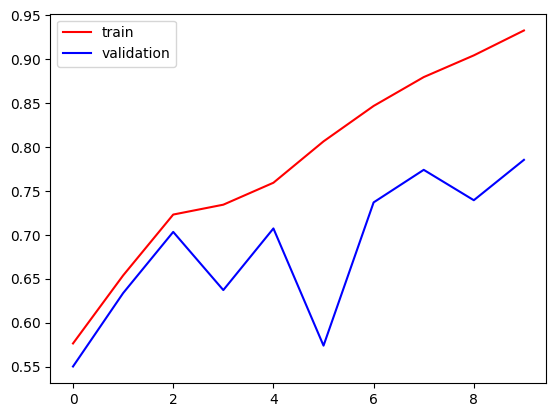

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()

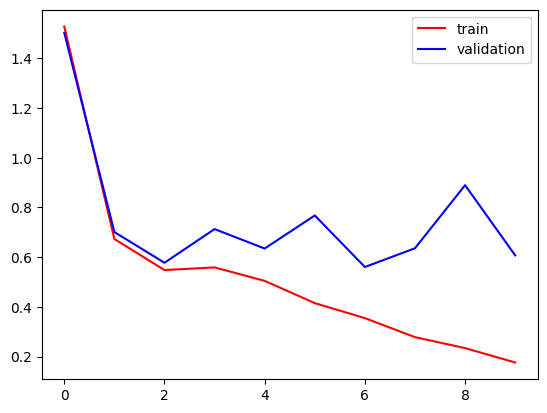

In [22]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()


In [28]:
image1 = keras.utils.load_img("/content/download.jpg",target_size=(256,256))

input_arr = keras.utils.img_to_array(image1)
i=tf.cast(input_arr/255. ,tf.float32)
i=tf.expand_dims(i,axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.999361]]


In [31]:
def out(path):
  image1 = keras.utils.load_img(path=path
                                ,target_size=(256,256))
  input_arr = keras.utils.img_to_array(image1)
  i=tf.cast(input_arr/255. ,tf.float32)
  i=tf.expand_dims(i,axis=0)
  x=model.predict(i)
  if(x>=0.5):
    print("Dog")
  else:
    print("Cat")

In [34]:
out("/content/download.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Cat


In [36]:
from google.colab import drive
drive.mount('/content/drive')

model.save("/content/drive/MyDrive/my_model.keras")


Mounted at /content/drive
